Лабораторная работа
=====================

Цель лабораторной работы получить практические знания по работе с признаками на известном датасете статистики самоубийств.

Вам необходимо будет подготовить данные для обучения линейной модели предсказания количества самоубийств (столбец - suicides/100k pop).

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

### Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

### Inspiration
Suicide Prevention.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [3]:
df.isnull().sum()

sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [4]:
df.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.describe(include=object)

,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820
unique,2,6,2321,2321,6
top,female,25-34 years,Ukraine2005,"32,287,031,000",Generation X
freq,13910,4642,12,12,6408


Эти значения нужно перевести в скаляр

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


### Наблюдения
1. Максимальное значение suicides_no 22338, что странно и выглядит выбросом
2. population - ок
3. suicides/100k pop также большое максимально значение, нужно проверить
4. HDI for year - 19456 пропусков. Human Development Index (HDI). Definition: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. 
5. gdp_per_capita - ок
6. sex - перевести в скаляр (one hot encoder)
7. age и generation - объединить и перевести в скаляр (one hot encoder)
8. country-year	- перевести в скаляр
9. gdp_for_year ()	- перевести в скаляр

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### suicides_no

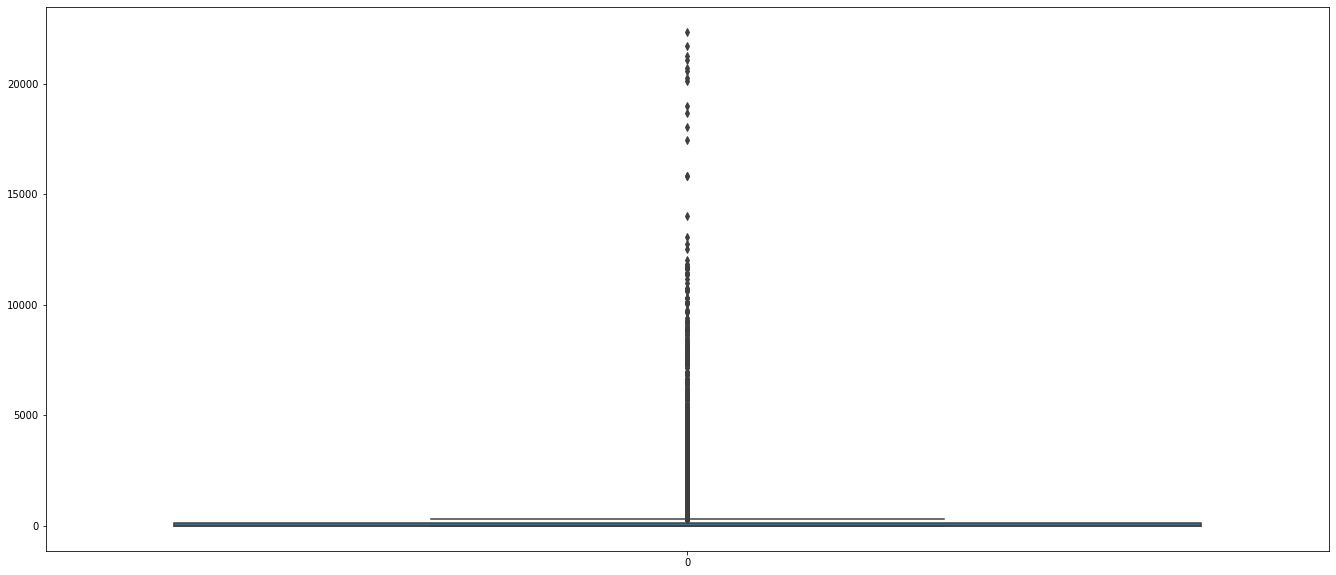

In [8]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(data=df['suicides_no'])

In [9]:
df.loc[df['suicides_no'] > 4000]

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13367,male,35-54 years,6962,17833300,39.04,Japan1985,0.791,"1,398,892,744,821",12401,Silent
13378,male,55-74 years,4171,9374000,44.50,Japan1986,NaN,"2,078,953,333,674",18288,G.I. Generation
13379,male,35-54 years,7298,18094000,40.33,Japan1986,NaN,"2,078,953,333,674",18288,Silent
13391,male,35-54 years,6688,18218000,36.71,Japan1987,NaN,"2,532,808,573,157",22137,Silent
13403,male,35-54 years,6087,18287000,33.29,Japan1988,NaN,"3,071,683,013,179",26687,Silent
...,...,...,...,...,...,...,...,...,...,...
27209,male,55-74 years,9068,32264697,28.11,United States2015,NaN,"18,120,714,000,000",60387,Boomers
27210,male,35-54 years,11634,41658010,27.93,United States2015,NaN,"18,120,714,000,000",60387,Generation X
27211,male,25-34 years,5503,22137097,24.86,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27212,male,15-24 years,4359,22615073,19.27,United States2015,NaN,"18,120,714,000,000",60387,Millenials


#### Вывод по suicides_no: со значениями порядок

In [10]:
### Проверю колонку suicides/100k pop. Если она в порядке, то population / suicides_no должно равнятся suicides/100k pop
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [11]:
df['suicides_no'] / (df['population'] / 100000) 

0        6.711409
1        5.194805
2        4.832585
3        4.587156
4        3.281079
           ...   
27815    2.955121
27816    2.582756
27817    2.172215
27818    1.671987
27819    1.459413
Length: 27820, dtype: float64

In [12]:
### удаляю suicides_no	population

In [13]:
extract = r'([A-Za-z]+)([0-9]+)'
info_data = df['country-year'].str.extract(extract)

In [14]:
info_data.head()

,0,1
0,Albania,1987
1,Albania,1987
2,Albania,1987
3,Albania,1987
4,Albania,1987


In [15]:
info_data.columns = ['country', 'year']
info_data['year'] = info_data['year'].astype(int)
info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  27820 non-null  object
 1   year     27820 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 326.1+ KB


#### Теперь добавлю колонки

In [16]:
df['country'] = info_data['country']
df['year'] = info_data['year']
df.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Albania,1987
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Albania,1987
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Albania,1987
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Albania,1987
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Albania,1987


#### HDI for year. Нашёл вот тут http://hdr.undp.org/en/data#

In [17]:
df_hdi = pd.read_csv('Human Development Index (HDI).csv', skiprows=[0], sep=',')
df_hdi.head()

,HDI Rank (2018),Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,...,2014,Unnamed: 51,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59
0,170,Afghanistan,0.298,NaN,0.304,NaN,0.312,NaN,0.308,NaN,...,0.488,NaN,0.490,NaN,0.491,NaN,0.493,NaN,0.496,NaN
1,69,Albania,0.644,NaN,0.625,NaN,0.608,NaN,0.611,NaN,...,0.787,NaN,0.788,NaN,0.788,NaN,0.789,NaN,0.791,NaN
2,82,Algeria,0.578,NaN,0.582,NaN,0.589,NaN,0.593,NaN,...,0.749,NaN,0.751,NaN,0.755,NaN,0.758,NaN,0.759,NaN
3,36,Andorra,..,NaN,..,NaN,..,NaN,..,NaN,...,0.853,NaN,0.850,NaN,0.854,NaN,0.852,NaN,0.857,NaN
4,149,Angola,..,NaN,..,NaN,..,NaN,..,NaN,...,0.557,NaN,0.565,NaN,0.570,NaN,0.576,NaN,0.574,NaN


In [18]:
hdi_columns = list(df_hdi.columns)

In [19]:
### удаляю пустые колонки

In [20]:
for column in hdi_columns:
    if 'Unnamed:' in column:
        df_hdi.drop([column], axis=1, inplace=True)
df_hdi.drop(['HDI Rank (2018)'], axis=1, inplace=True)
df_hdi

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,..,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,..,..,..,..,..,..,..,..,..,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Least Developed Countries,0.350,0.353,0.354,0.358,0.358,0.366,0.374,0.381,0.388,...,0.477,0.485,0.493,0.499,0.504,0.510,0.516,0.520,0.525,0.528
203,Small Island Developing States,0.595,0.598,0.603,0.608,0.612,0.618,0.624,0.629,0.632,...,0.694,0.702,0.706,0.704,0.708,0.712,0.717,0.719,0.722,0.723
204,Organization for Economic Co-operation and Dev...,0.785,0.790,0.788,0.800,0.807,0.812,0.817,0.817,0.826,...,0.868,0.873,0.877,0.879,0.883,0.886,0.889,0.892,0.894,0.895
205,World,0.598,0.601,0.601,0.608,0.611,0.617,0.622,0.624,0.631,...,0.691,0.697,0.703,0.708,0.713,0.718,0.722,0.727,0.729,0.731


#### Заменяю .. значения средними по строке, но сначала нужно привести всё к одному виду

In [21]:
import numpy as np

In [22]:
df_hdi = df_hdi.replace(['..', ' '], np.nan)
df_hdi.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [23]:
df_hdi = df_hdi.astype(float, errors='ignore')
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  206 non-null    object 
 1   1990     159 non-null    float64
 2   1991     159 non-null    float64
 3   1992     158 non-null    float64
 4   1993     159 non-null    float64
 5   1994     159 non-null    float64
 6   1995     163 non-null    float64
 7   1996     163 non-null    float64
 8   1997     162 non-null    float64
 9   1998     163 non-null    float64
 10  1999     166 non-null    float64
 11  2000     189 non-null    float64
 12  2001     189 non-null    float64
 13  2002     190 non-null    float64
 14  2003     192 non-null    float64
 15  2004     194 non-null    float64
 16  2005     201 non-null    float64
 17  2006     201 non-null    float64
 18  2007     201 non-null    float64
 19  2008     201 non-null    float64
 20  2009     201 non-null    float64
 21  2010     203 non

In [24]:
df_hdi.loc[df_hdi['Country'] == 'Andorra', '1999':]

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,NaN,0.759,0.767,0.78,0.82,0.826,0.819,0.829,0.829,0.831,0.83,0.828,0.827,0.849,0.846,0.853,0.85,0.854,0.852,0.857


In [25]:
cols = df_hdi.columns.tolist()
countries = df_hdi['Country']

In [26]:
df_hdi.drop('Country', inplace=True, axis=1)

In [27]:
df_hdi = df_hdi.T.fillna(df_hdi.T.mean()).T

In [28]:
df_hdi.insert(0, 'Country', countries) 

In [29]:
df_hdi.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298000,0.304000,0.312000,0.308000,0.303000,0.327000,0.331000,0.335000,0.339000,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.644000,0.625000,0.608000,0.611000,0.617000,0.629000,0.639000,0.639000,0.649000,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.578000,0.582000,0.589000,0.593000,0.597000,0.602000,0.610000,0.619000,0.629000,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,0.826632,0.826632,0.826632,0.826632,0.826632,0.826632,0.826632,0.826632,0.826632,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,0.491650,0.491650,0.491650,0.491650,0.491650,0.491650,0.491650,0.491650,0.491650,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [30]:
#### делаю датафрейм с колонкой country и year для каждоый страны

In [31]:
df_hdi = df_hdi.set_index('Country').stack().reset_index(name='HDI for year')
df_hdi.rename(columns={'Country': 'country', 'level_1': 'year'}, inplace=True)
df_hdi.head()

,country,year,HDI for year
0,Afghanistan,1990,0.298
1,Afghanistan,1991,0.304
2,Afghanistan,1992,0.312
3,Afghanistan,1993,0.308
4,Afghanistan,1994,0.303


In [32]:
df_hdi['year'] = df_hdi['year'].astype(int)

In [33]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       5916 non-null   object 
 1   year          5916 non-null   int32  
 2   HDI for year  5916 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 115.7+ KB


#### Теперь нужно добавить значения из df_hdi в df

In [34]:
# на всякий случай создаю 2 копии датафреймов. Сохранился

In [35]:
df2 = df.copy()
df_hdi2 = df_hdi.copy()

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  country             27820 non-null  object 
 11  year                27820 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 2.4+ MB


In [37]:
df2['year'].min(), df2['year'].max(), df2['year'].count(), df2['country'].count()

(1985, 2016, 27820, 27820)

In [38]:
df_hdi2['year'].min(), df_hdi2['year'].max(), df_hdi2['year'].count(), df_hdi2['country'].count()

(1990, 2018, 5916, 5916)

In [39]:
#удалю из df2 данные страше 1990 года (<1990)

In [40]:
df2 = df2.drop(df2[df2.year < 1990].index)
# df2 = df2[df2.year > 1989]
df2.count()

sex                   24808
age                   24808
suicides_no           24808
population            24808
suicides/100k pop     24808
country-year          24808
HDI for year           7920
 gdp_for_year ($)     24808
gdp_per_capita ($)    24808
generation            24808
country               24808
year                  24808
dtype: int64

In [41]:
# Теперь удаляю данные старше 2016 года из df_hdi2:

In [42]:
df_hdi2 = df_hdi2.drop(df_hdi2[df_hdi2.year > 2016].index)

In [43]:
df_hdi2['year'].min(), df_hdi2['year'].max(), df_hdi2['year'].count(), df_hdi2['country'].count()

(1990, 2016, 5508, 5508)

In [44]:
#список стран, которые общие с df_hdi2

In [45]:
print(set(df2['country']).intersection(set(df_hdi2['country'])))

{'Australia', 'Israel', 'Suriname', 'Oman', 'Kiribati', 'Kazakhstan', 'Finland', 'Albania', 'Azerbaijan', 'Japan', 'Ukraine', 'Philippines', 'Malta', 'Greece', 'Georgia', 'Iceland', 'Grenada', 'Guatemala', 'Latvia', 'Bahamas', 'Luxembourg', 'Bulgaria', 'Switzerland', 'Portugal', 'Colombia', 'Estonia', 'Slovakia', 'Qatar', 'Armenia', 'Barbados', 'Chile', 'Denmark', 'Panama', 'Sweden', 'Kuwait', 'Fiji', 'Uruguay', 'Guyana', 'Norway', 'Belgium', 'Italy', 'Mongolia', 'Singapore', 'Bahrain', 'Spain', 'Germany', 'Serbia', 'Uzbekistan', 'Romania', 'Jamaica', 'Ecuador', 'Montenegro', 'Thailand', 'Poland', 'Netherlands', 'Lithuania', 'Maldives', 'France', 'Croatia', 'Seychelles', 'Mexico', 'Brazil', 'Ireland', 'Kyrgyzstan', 'Belarus', 'Belize', 'Paraguay', 'Mauritius', 'Turkey', 'Argentina', 'Turkmenistan', 'Nicaragua', 'Cuba', 'Slovenia', 'Hungary', 'Canada', 'Cyprus', 'Austria'}


In [46]:
countries_to_keep = set(df2['country']).intersection(set(df_hdi2['country']))

In [47]:
len(countries_to_keep)

78

In [48]:
#Оставляю в df2 только общие с df_hdi2 страны (countries_to_keep). Опять же, можно было подумать о значении World. Но не сегодня

In [49]:
#df_hdi2 = df_hdi2.drop(df_hdi2.loc[~df_hdi2['country'].isin(countries_to_keep), :].index)

In [50]:
# выборочная проверка значений для одной страны

In [51]:
sdfdf

NameError: name 'sdfdf' is not defined

In [52]:
df2.year = df2.year.astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24808 entries, 36 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 24808 non-null  object 
 1   age                 24808 non-null  object 
 2   suicides_no         24808 non-null  int64  
 3   population          24808 non-null  int64  
 4   suicides/100k pop   24808 non-null  float64
 5   country-year        24808 non-null  object 
 6   HDI for year        7920 non-null   float64
 7    gdp_for_year ($)   24808 non-null  object 
 8   gdp_per_capita ($)  24808 non-null  int64  
 9   generation          24808 non-null  object 
 10  country             24808 non-null  object 
 11  year                24808 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 2.4+ MB


In [53]:
df2.loc[df2['country'] == 'Albania', ['year','HDI for year']].sort_values(by='year', ascending=True).head(20)

,year,HDI for year
36,1992,NaN
47,1992,NaN
46,1992,NaN
45,1992,NaN
43,1992,NaN
42,1992,NaN
44,1992,NaN
40,1992,NaN
39,1992,NaN
38,1992,NaN


In [54]:
df_hdi2.loc[df_hdi2['country'] == 'Albania', ['year','HDI for year']].sort_values(by='year', ascending=True).head(10)

,year,HDI for year
29,1990,0.644
30,1991,0.625
31,1992,0.608
32,1993,0.611
33,1994,0.617
34,1995,0.629
35,1996,0.639
36,1997,0.639
37,1998,0.649
38,1999,0.660


In [55]:
df2.loc[df2['country'] == 'Albania', :].head(20)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,country,year
36,male,35-54 years,12,343800,3.49,Albania1992,NaN,"709,452,584",251,Boomers,Albania,1992
37,male,15-24 years,9,263700,3.41,Albania1992,NaN,"709,452,584",251,Generation X,Albania,1992
38,male,55-74 years,5,159500,3.13,Albania1992,NaN,"709,452,584",251,Silent,Albania,1992
39,male,25-34 years,7,245500,2.85,Albania1992,NaN,"709,452,584",251,Boomers,Albania,1992
40,female,15-24 years,7,292400,2.39,Albania1992,NaN,"709,452,584",251,Generation X,Albania,1992
41,female,25-34 years,4,267400,1.50,Albania1992,NaN,"709,452,584",251,Boomers,Albania,1992
42,female,35-54 years,2,323100,0.62,Albania1992,NaN,"709,452,584",251,Boomers,Albania,1992
43,female,55-74 years,1,164900,0.61,Albania1992,NaN,"709,452,584",251,Silent,Albania,1992
44,female,5-14 years,0,336700,0.00,Albania1992,NaN,"709,452,584",251,Millenials,Albania,1992
45,female,75+ years,0,38700,0.00,Albania1992,NaN,"709,452,584",251,G.I. Generation,Albania,1992


In [ ]:
#Следующий код нашёл здесь https://coderoad.ru/29357379/Pandas-%D0%B7%D0%B0%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D1%8C-%D0%BD%D0%B5%D0%B4%D0%BE%D1%81%D1%82%D0%B0%D1%8E%D1%89%D0%B8%D0%B5-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F-%D0%B2-dataframe-%D0%B8%D0%B7-%D0%B4%D1%80%D1%83%D0%B3%D0%BE%D0%B3%D0%BE-dataframe

In [56]:
df2 = df2.combine_first(df_hdi2)

In [58]:
df2.loc[df2['country'] == 'Albania', :].head(30)

,gdp_for_year ($),HDI for year,age,country,country-year,gdp_per_capita ($),generation,population,sex,suicides/100k pop,suicides_no,year
29,NaN,0.644,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.0
30,NaN,0.625,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.0
31,NaN,0.608,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.0
32,NaN,0.611,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993.0
33,NaN,0.617,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
34,NaN,0.629,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0
35,NaN,0.639,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0
36,"709,452,584",0.639,35-54 years,Albania,Albania1992,251.0,Boomers,343800.0,male,3.49,12.0,1992.0
37,"709,452,584",0.649,15-24 years,Albania,Albania1992,251.0,Generation X,263700.0,male,3.41,9.0,1992.0
38,"709,452,584",0.660,55-74 years,Albania,Albania1992,251.0,Silent,159500.0,male,3.13,5.0,1992.0


In [ ]:
df2.head(10)

In [ ]:
df2.info()

In [ ]:
df2.isna().sum()

In [ ]:
#Дропнем лишнее

In [ ]:
df2.loc[df2['age'].isna(), :]

In [ ]:
df2 = df2.dropna(subset=['age']) 

In [ ]:
df2.loc[df2['country'] == 'Albania', ['year','HDI for year']].sort_values(by='year', ascending=True).head(20)

In [ ]:
df2.loc[(df2['country'] == 'Albania') & (df2['year'] == '1992'), ['year','HDI for year']]

In [ ]:
df2['country'].nunique()

In [ ]:
df2.isna().sum()

#### Было 19456 отсутсвующих значений. В общем не много добавилось

#### Теперь заменим отсутсвующие HDI for year средним значением в df2

In [ ]:
df2[df2.isnull().any(axis=1)].head()

In [ ]:
#но сначала посмотрим, есть ли разница между female и male. Если разницы нет, то можно удалить этот признак

In [ ]:
filter_na = df2[df2.isnull().any(axis=1)].head()

In [ ]:
import scipy.stats as sts
import researchpy as rp

In [ ]:
male = df2[df2['sex'] == 'male']['HDI for year']
female = df2[df2['sex'] == 'female']['HDI for year']

In [ ]:
descriptives, results = rp.ttest(male, female)

descriptives

In [ ]:
results

#### Вывод: удалять нельзя, так как p-value значительно больше 0.05

In [ ]:
(df2
     .groupby(['country', 'sex'])
     .agg({'HDI for year': 'mean'})
).tail()

In [ ]:
#среднее значение для одной страны для женщин 

In [ ]:
df2.loc[df2['country'] == 'Verde', :]